## Task 1- Import Required Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import random as rd

## Task 2 - Generate random social media data

In [3]:
# list of categories
categories = ['Food', 'Fashion', 'Fitness', 'Music', 'Culture', 'Family', 'Health']

In [7]:
data = {
    'Date' : pd.date_range('2021-01-01', periods = 500),
    'Category' : [rd.choice(categories) for _ in range(500)],
    'Likes' : np.random.randint(0, 10000, size = 500)
}

print(data)

{'Date': DatetimeIndex(['2021-01-01', '2021-01-02', '2021-01-03', '2021-01-04',
               '2021-01-05', '2021-01-06', '2021-01-07', '2021-01-08',
               '2021-01-09', '2021-01-10',
               ...
               '2022-05-06', '2022-05-07', '2022-05-08', '2022-05-09',
               '2022-05-10', '2022-05-11', '2022-05-12', '2022-05-13',
               '2022-05-14', '2022-05-15'],
              dtype='datetime64[ns]', length=500, freq='D'), 'Category': ['Family', 'Fashion', 'Culture', 'Fashion', 'Food', 'Culture', 'Culture', 'Family', 'Fitness', 'Music', 'Fashion', 'Fashion', 'Fashion', 'Fitness', 'Family', 'Food', 'Fashion', 'Music', 'Culture', 'Music', 'Culture', 'Fashion', 'Health', 'Food', 'Music', 'Food', 'Music', 'Health', 'Food', 'Food', 'Family', 'Fashion', 'Music', 'Health', 'Family', 'Food', 'Health', 'Family', 'Culture', 'Fashion', 'Family', 'Health', 'Health', 'Family', 'Food', 'Fitness', 'Health', 'Music', 'Culture', 'Food', 'Music', 'Family', 'Fitness', 'Fi

## Task 3 - Load the data into a pandas dataframe and explore

In [8]:
# convert the dictionary into a dataframe
data = pd.DataFrame(data)

#show first five elements of the dataframe
data.head()

,Date,Category,Likes
0,2021-01-01,Family,9833
1,2021-01-02,Fashion,3410
2,2021-01-03,Culture,2878
3,2021-01-04,Fashion,3744
4,2021-01-05,Food,6484


In [20]:
# show dataframe information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      500 non-null    datetime64[ns]
 1   Category  500 non-null    object        
 2   Likes     500 non-null    int32         
dtypes: datetime64[ns](1), int32(1), object(1)
memory usage: 9.9+ KB


In [10]:
# dataframe shape
data.shape

(500, 3)

In [13]:
# dataframe description
data.describe

<bound method NDFrame.describe of           Date Category  Likes
0   2021-01-01   Family   9833
1   2021-01-02  Fashion   3410
2   2021-01-03  Culture   2878
3   2021-01-04  Fashion   3744
4   2021-01-05     Food   6484
..         ...      ...    ...
495 2022-05-11     Food   6131
496 2022-05-12    Music   4800
497 2022-05-13  Fitness     70
498 2022-05-14  Fashion   4270
499 2022-05-15     Food   3540

[500 rows x 3 columns]>

In [19]:
# print the count of each category
data.value_counts(data['Category'])

Category
Music      86
Food       75
Culture    74
Fitness    73
Health     67
Family     63
Fashion    62
dtype: int64

## Task 4 - Data Cleaning

In [21]:
# Remove nulls
data = data.dropna()
data.shape

(500, 3)

In [22]:
# Remove duplicates
data = data.drop_duplicates()
data.shape

(500, 3)

In [24]:
# Convert the Date column into datetime
data['Date'] = pd.to_datetime(data['Date'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      500 non-null    datetime64[ns]
 1   Category  500 non-null    object        
 2   Likes     500 non-null    int32         
dtypes: datetime64[ns](1), int32(1), object(1)
memory usage: 13.7+ KB


In [26]:
data['Likes'] = data['Likes'].astype('int')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      500 non-null    datetime64[ns]
 1   Category  500 non-null    object        
 2   Likes     500 non-null    int32         
dtypes: datetime64[ns](1), int32(1), object(1)
memory usage: 13.7+ KB


## Task 5 - Visualize and Analyze the Data

In [62]:
# setting the char area
sb.set(rc={"figure.figsize":(10, 5)})

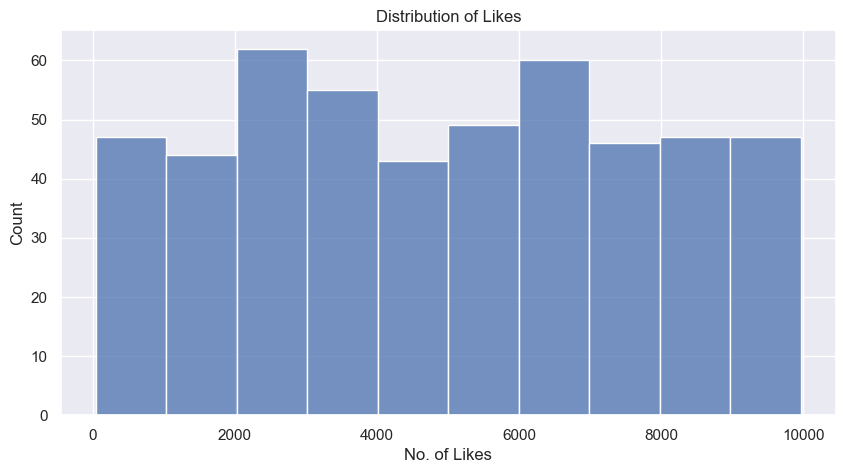

In [63]:
# frequency distribution of likes
sb.histplot(x = data['Likes'])
plt.xlabel('No. of Likes')
plt.title('Distribution of Likes')
plt.show();

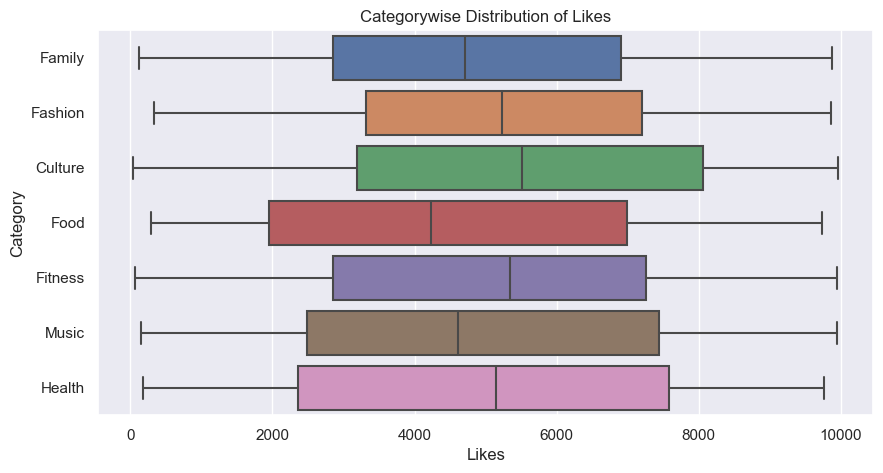

In [64]:
# box plot for Categorywise Likes
sb.boxplot(x = data['Likes'], y = data['Category'])
plt.title('Categorywise Distribution of Likes')
plt.show();

In [65]:
# average likes
data['Likes'].mean()

4972.244

In [75]:
# mean of each category
avg_likes_per_category = round(data.groupby('Category')['Likes'].mean(), 2)
print(avg_likes_per_category)

Category
Culture    5470.31
Family     5021.90
Fashion    5069.50
Fitness    5035.33
Food       4510.33
Health     5034.94
Music      4737.62
Name: Likes, dtype: float64


## Task 6 - Describe Conclusions